# TP2 MACHINE LEARNING

## k-plus proches voisins, analyse discriminante et régression logistique

### Génération artificielle de données

In [1]:
from tp_knn_source import *
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import random

In [2]:
def ErrorRate(Y_estim, Y):
    '''Fonction qui calcule le taux d\'erreur '''
    Y_error = Y_estim - Y
    Error_Rate = len(Y_error[Y_error!=0]) / len(Y_error)
    print('le taux d\'erreur sur les données de test vaut', round(Error_Rate,3))

## Question 1

#### rand_bi_gauss

In [3]:
print('rand_bi_gauss shuffle deux lois gausiennes et leur associe des labels (-1 et 1) ')
n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)

rand_bi_gauss shuffle deux lois gausiennes et leur associe des labels (-1 et 1) 


#### rand_tri_gauss

In [4]:
print('rand_tri_gauss shuffle trois lois gausiennes et leur associe des labels (0, 1, 2) ')
n1 = 50
n2 = 50
n3 = 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigmas1 = [0.9, 0.9]
sigmas2 = [0.9, 0.9]
sigmas3 = [0.9, 0.9]
X2, y2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigmas1, sigmas2, sigmas3)

rand_tri_gauss shuffle trois lois gausiennes et leur associe des labels (0, 1, 2) 


#### rand_clown

In [5]:
print('rand_clown crée 2 blobs et des labels associés (2)')
n1 = 50
n2 = 50
sigmas1 = 1.
sigmas2 = 5.
X3, y3 = rand_clown(n1, n2, sigmas1, sigmas2)

rand_clown crée 2 blobs et des labels associés (2)


#### rand_checkers

In [6]:
print('rand_checkers crée 2 blobs et des labels associés (3)')
n1 = 150
n2 = 150
sigma = 0.9
X4, y4 = rand_checkers(n1, n2, sigma)

rand_checkers crée 2 blobs et des labels associés (3)


In [7]:
print('Les dernières colonnes correspondent aux Y, les labels')

Les dernières colonnes correspondent aux Y, les labels


## Question 2

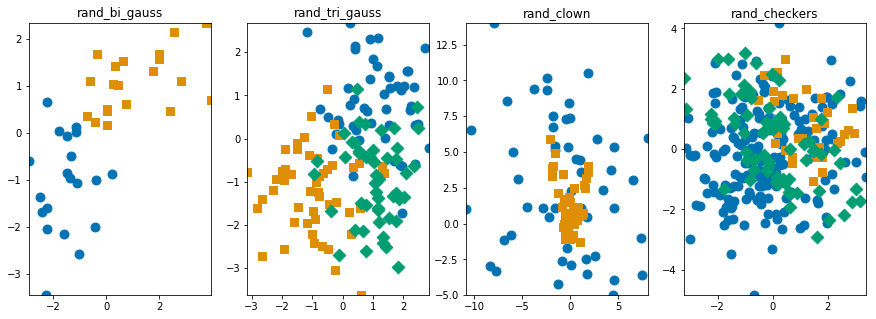

In [8]:
plt.close("all")
plt.figure(1, figsize=(15, 5))
plt.subplot(141)
plt.title('rand_bi_gauss')
plot_2d(X1, y1)
plt.subplot(142)
plt.title('rand_tri_gauss')
plot_2d(X2, y2)
plt.subplot(143)
plt.title('rand_clown')
plot_2d(X3, y3)
plt.subplot(144)
plt.title('rand_checkers')
plot_2d(X4, y4)
plt.show()

## Approche intuitive

## Question 3

## Approche formelle

## Question 4

### Classe

In [9]:
class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Homemade kNN classifier class """
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        self.X = []
        self.Y = []
        self.points = []

    def fit(self, X, Y):
        self.X = X
        self.Y = Y.astype('int') 
        
        return self
    
    def predict(self, points):
        self.points.append(points)
        distance = []
        for X_ in self.X:
            euclid = np.sqrt(np.sum(np.square(np.array(X_) - np.array(points))))
            distance.append(euclid)
        distance_sort = self.Y[np.argsort(distance)[:self.n_neighbors]]
        label_index = np.argmax(np.bincount(distance_sort))
        label_predict = distance_sort[label_index]
        return [label_predict]

### comparaison entre la classe produite et Sickit 

In [10]:
x_train, x_test, y_train, y_test = \
train_test_split(X2, y2, test_size=0.2, random_state=2)

#avec la classe créee
KNN_home = KNNClassifier(5)
print(KNN_home.fit(x_train, y_train))
print(KNN_home.predict([1, 0.5]))

#avec la librairie Sickit
KNN_Sickit = KNeighborsClassifier(n_neighbors=5)
KNN_Sickit.fit(x_train, y_train) 
print('prédiction du test')
print(KNN_Sickit.predict([[1, 0.5]]))

KNNClassifier(n_neighbors=5)
[1]
prédiction du test
[1.]


## Question 5

### Réecriture de la fonction

In [11]:
def frontiere_new(f, X, y, w=None, step=50, alpha_choice=1, colorbar=True,
                  samples=True):
    """ trace la frontiere pour la fonction de decision f"""
    # construct cmap

    min_tot0 = np.min(X[:, 0])
    min_tot1 = np.min(X[:, 1])
    max_tot0 = np.max(X[:, 0])
    max_tot1 = np.max(X[:, 1])
    delta0 = (max_tot0 - min_tot0)
    delta1 = (max_tot1 - min_tot1)
    xx, yy = np.meshgrid(np.arange(min_tot0, max_tot0, delta0 / step),
                         np.arange(min_tot1, max_tot1, delta1 / step))
    #z = np.array([f([vec]) for vec in np.c_[xx.ravel(), yy.ravel()]])
    z = np.array([f.predict([vec]).astype(int) for vec in np.c_[xx.ravel(), yy.ravel()]])
    z = z.reshape(xx.shape)
    labels = np.unique(z)
    color_blind_list = sns.color_palette("colorblind", labels.shape[0])
    sns.set_palette(color_blind_list)
    my_cmap = ListedColormap(color_blind_list)
    plt.imshow(z, origin='lower', interpolation="mitchell", alpha=0.80,
               cmap=my_cmap, extent=[min_tot0, max_tot0, min_tot1, max_tot1])
    if colorbar is True:
        ax = plt.gca()
        cbar = plt.colorbar(ticks=labels)
        cbar.ax.set_yticklabels(labels)
    labels = np.unique(y)
    k = np.unique(y).shape[0]
    color_blind_list = sns.color_palette("colorblind", k)
    sns.set_palette(color_blind_list)
    ax = plt.gca()
    if samples is True:
        for i, label in enumerate(y):
            label_num = np.where(labels == label)[0][0]
            plt.scatter(X[i, 0], X[i, 1], c=color_blind_list[label_num],
                        s=80, marker=symlist[label_num])
    plt.xlim([min_tot0, max_tot0])
    plt.ylim([min_tot1, max_tot1])
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    if w is not None:
        plt.plot([min_tot0, max_tot0],
                 [min_tot0 * -w[1] / w[2] - w[0] / w[2],
                  max_tot0 * -w[1] / w[2] - w[0] / w[2]],
                 "k", alpha=alpha_choice)

### Graphiques des classifications

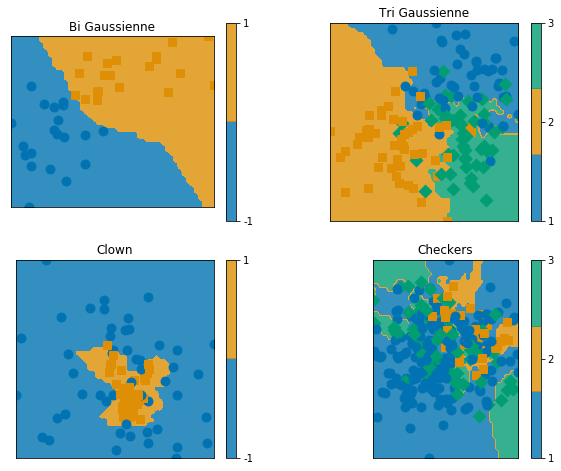

In [12]:
KNN_Sickit = KNeighborsClassifier(n_neighbors=5)

plt.figure(figsize=(10,8))
plt.subplot(221)
KNN_Sickit.fit(X1, y1) 
frontiere_new(KNN_Sickit, X1, y1)
plt.title('Bi Gaussienne')

plt.subplot(222)
KNN_Sickit.fit(X2, y2) 
frontiere_new(KNN_Sickit, X2, y2)
plt.title('Tri Gaussienne')

plt.subplot(223)
KNN_Sickit.fit(X3, y3) 
frontiere_new(KNN_Sickit, X3, y3)
plt.title('Clown')

plt.subplot(224)
KNN_Sickit.fit(X4, y4) 
frontiere_new(KNN_Sickit, X4, y4)
plt.title('Checkers')
plt.show()

## Question 6

Plus on augmente le nombre de neighbors plus les frontieres sont simples
Au contraire un petit k donnera des frontières complexes


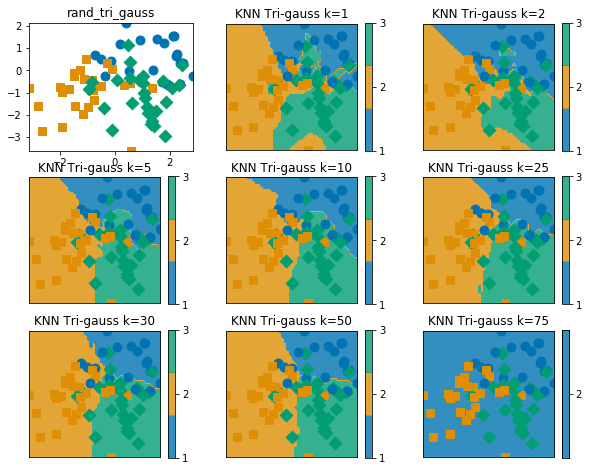

In [13]:
X2Q6_pair = X2[1::2]
Y2Q6_pair = y2[1::2]
k_list = [1, 2, 5, 10, 25, 30, 50, 75]

# utilisation de plot-2d
plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
plot_2d(X2Q6_pair, Y2Q6_pair)
plt.title('rand_tri_gauss')

# affichage de la clissafication selon k
for i, k_ in enumerate(k_list):
    KNN_Sickit = KNeighborsClassifier(n_neighbors=k_)
    plt.subplot(3,3,i+2)
    KNN_Sickit.fit(X2Q6_pair, Y2Q6_pair) 
    frontiere_new(KNN_Sickit, X2Q6_pair, Y2Q6_pair)
    plt.title(f'KNN Tri-gauss k={k_}')    
    
print('Plus on augmente le nombre de neighbors plus les frontieres sont simples')
print('Au contraire un petit k donnera des frontières complexes')

## Question 7

### Mise en place d'un nouveau poids

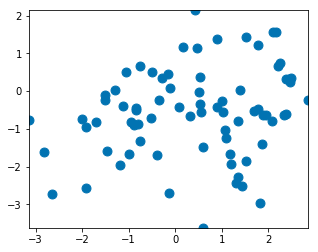

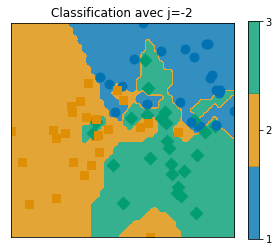

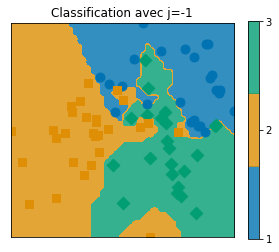

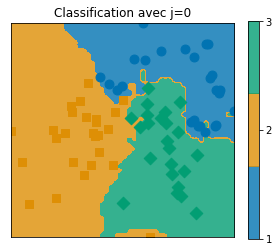

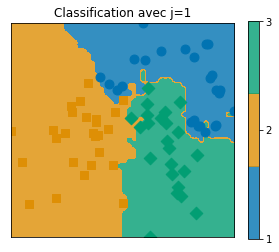

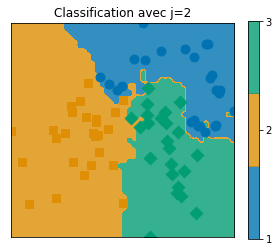

In [14]:
plt.figure(figsize=(5,4))

plot_2d(X2Q6_pair)

for i, j in enumerate([-2, -1, 0, 1, 2]):
    
    def new_weight(distances) :
    
        h = 10
        return np.exp((-distances**2)/h**(j))
       
    knn_sklearn = KNeighborsClassifier(n_neighbors=5, weights=new_weight)
    knn_sklearn.fit(X2Q6_pair, Y2Q6_pair)
    knn_sklearn.predict(X2Q6_pair)
    plt.figure(figsize=(5,4))
    frontiere_new(knn_sklearn, X2Q6_pair, knn_sklearn.predict(X2Q6_pair))
    plt.title(f'Classification avec j={j}')
    plt.show()

### classification

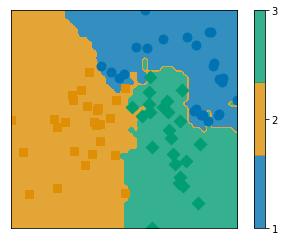

In [15]:
knn_sklearn = KNeighborsClassifier(n_neighbors=5, weights=new_weight)
knn_sklearn.fit(X2Q6_pair, Y2Q6_pair)
knn_sklearn.predict(X2Q6_pair)
frontiere_new(knn_sklearn, X2Q6_pair, knn_sklearn.predict(X2Q6_pair))

## Question 8

In [16]:
## je pars du principe qu'on demande le jeu de données #2
X2Q8_impair = X2[::2]
Y2Q8_impair = y2[::2]

print('Apprentissage sur le train lui même')
KNN_one1 = KNeighborsClassifier(n_neighbors=1)
KNN_one1.fit(X2Q6_pair, Y2Q6_pair)
ErrorRate(KNN_one1.predict(X2Q6_pair), Y2Q6_pair)
print('Normal que le taux d\'erreur soit à 0, overfitting')

print('\nApprentissage sur le set de test')
KNN_one2 = KNeighborsClassifier(n_neighbors=1)
KNN_one2.fit(X2Q6_pair, Y2Q6_pair)
ErrorRate(KNN_one2.predict(X2Q8_impair), Y2Q8_impair)


Apprentissage sur le train lui même
le taux d'erreur sur les données de test vaut 0.0
Normal que le taux d'erreur soit à 0, overfitting

Apprentissage sur le set de test
le taux d'erreur sur les données de test vaut 0.333


## Question 9

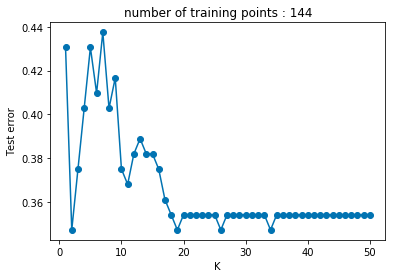

In [17]:
X4Q9_train = X4[1::2]
X4Q9_test = X4[::2]

Y4Q9_train = y4[1::2]
Y4Q9_test = y4[::2]

k_range = range(1, 51)
EC = ErrorCurve(k_range)
EC.fit_curve(X4Q9_train, Y4Q9_train, X4Q9_test, Y4Q9_test)
EC.plot()

## Question 10

<Figure size 720x576 with 0 Axes>

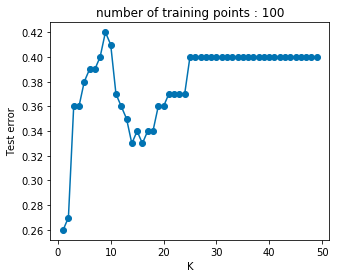

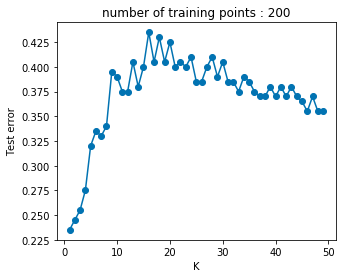

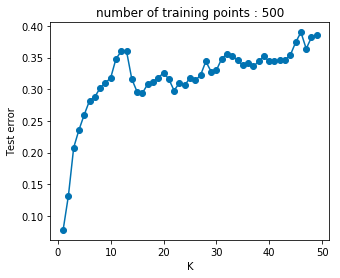

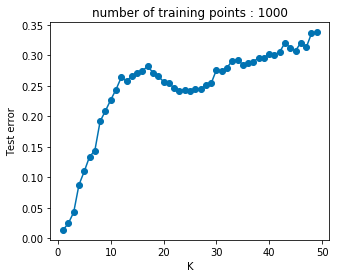

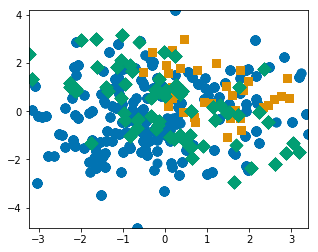

In [18]:
# Fonction pour tirage aléatoire avec remise
n_list = [100, 200, 500, 1000]

plt.figure(figsize = (10,8))

for i in range (len(n_list)):
    Tir_Al1 = random.choices(np.concatenate((X4, y4.reshape(-1,1)), axis = 1), k = n_list[i])
    X4_train_temp, y4_train_temp = np.split(Tir_Al1, [2], axis = 1)
    Tir_Al2 = random.choices(np.concatenate((X4, y4.reshape(-1,1)), axis = 1), k = n_list[i])
    X4_test_temp, y4_test_temp = np.split(Tir_Al2, [2], axis = 1)
    curve = ErrorCurve(k_range = range(1, 50))
    curve.fit_curve(X4_train_temp, y4_train_temp.ravel(), X4_test_temp, y4_test_temp.ravel())
    plt.figure(figsize = (5,4))
    plt.title('n = ' + str(n_list[i]))
    curve.plot()

plt.figure(figsize = (5,4))  
plot_2d(np.concatenate((X4_train_temp, X4_test_temp),axis=0), np.concatenate((y4_train_temp, y4_test_temp), axis=0))

## Question 11

## Question 12

 les clés de digits sont :
 dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
data represente les variables explicatives, 64 colonnes pour les 64 pixels et 1797 observations
target represente la variable à expliquer qui sont les chiffres de 0 à 9, c'est les labels valent entre 0 et 9
target_names pour le range de 0 à 9
images chaque features representent un pixel qui prend des valeurs de 0 à 16 selon l'intensité de noir
DESCR décrit le jeu de données


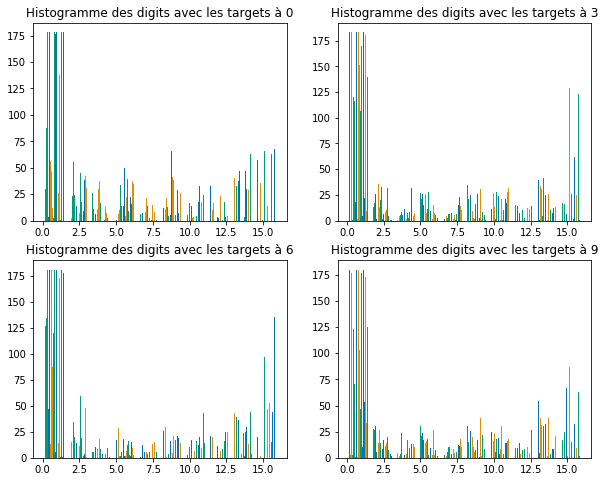

In [19]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits() #on charge 10 classes

print(' les clés de digits sont :\n', digits.keys())
print('data represente les variables explicatives, 64 colonnes pour les 64 pixels et 1797 observations')
print('target represente la variable à expliquer qui sont les chiffres de 0 à 9, c\'est les labels valent entre 0 et 9')
print('target_names pour le range de 0 à 9')
print('images chaque features representent un pixel qui prend des valeurs de 0 à 16 selon l\'intensité de noir')
print('DESCR décrit le jeu de données')

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.hist(digits.data[digits.target == 0.])
plt.title('Histogramme des digits avec les targets à 0')

plt.subplot(2,2,2)
plt.hist(digits.data[digits.target == 3.])
plt.title('Histogramme des digits avec les targets à 3')

plt.subplot(2,2,3)
plt.hist(digits.data[digits.target == 6.])
plt.title('Histogramme des digits avec les targets à 6')

plt.subplot(2,2,4)
plt.hist(digits.data[digits.target == 9.])
plt.title('Histogramme des digits avec les targets à 9')
plt.show()

digit_data_train, digit_data_test, digit_target_train, digit_target_test = \
train_test_split(digits.data, digits.target, test_size=0.5, random_state=2)

### Autre façon de présenter les graphiques

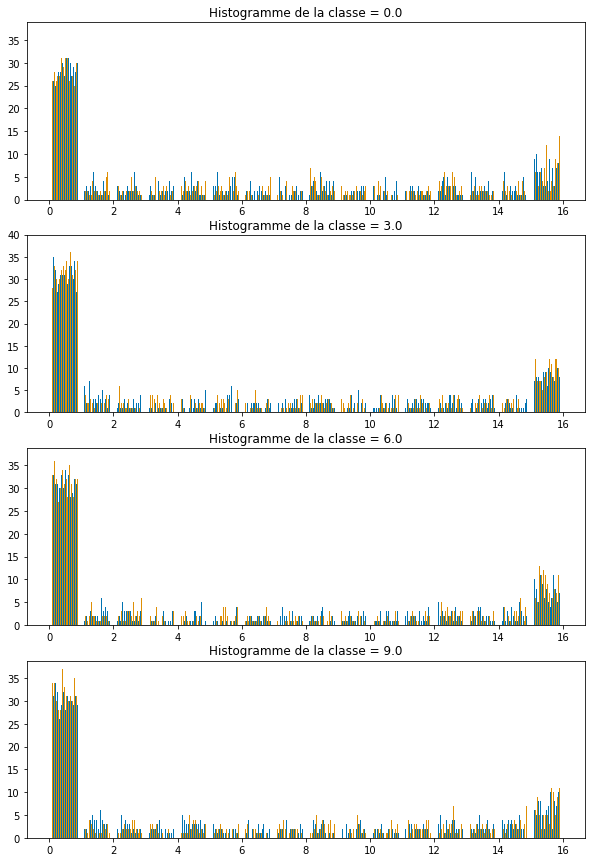

In [36]:
plt.figure(figsize=[10, 15])

classes = [0.,3.,6.,9.]

for i, k in enumerate(classes):
    plt.subplot(f'41{i+1}')
    plt.hist(digits.data[np.where(digits.target == k)].T, bins=16)
    plt.title(f'Histogramme de la classe = {k}')

### Le taux d'erreur

In [21]:
KNN_digits = KNeighborsClassifier(n_neighbors=5)
KNN_digits.fit(digit_data_train, digit_target_train)
ErrorRate(KNN_digits.predict(digit_data_test) ,digit_target_test)

le taux d'erreur sur les données de test vaut 0.022


## Question 13

In [22]:
Conf_Mat = confusion_matrix(digit_target_test, KNN_digits.predict(digit_data_test))
print(Conf_Mat)

[[93  0  0  0  0  0  0  0  0  0]
 [ 0 92  0  0  0  0  0  0  0  0]
 [ 0  0 80  0  0  0  0  0  0  0]
 [ 0  0  0 95  0  0  0  1  2  1]
 [ 0  0  0  0 84  0  0  3  0  0]
 [ 0  0  0  0  1 97  0  0  0  1]
 [ 0  0  0  0  0  0 97  0  1  0]
 [ 0  0  0  0  0  0  0 86  0  0]
 [ 0  5  0  0  0  0  0  0 74  0]
 [ 0  1  0  1  0  1  0  1  1 81]]


## Question 14

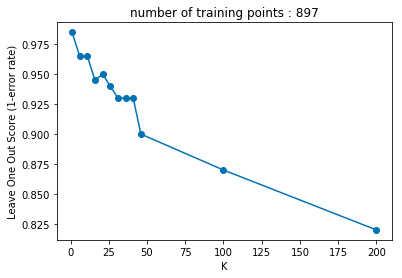

In [23]:
looc = LOOCurve(k_range=[1 , 6 , 11 , 16 , 21 , 26 , 31 , 36 , 41 , 46 , 100 , 200])
looc.fit_curve(digit_data_train, digit_target_train, n_iter=200, random_state=2)
plt.figure()
looc.plot()

## Question 15

#### avant-propos

$f_{+}\rightarrow G=N_{p}(\mu_{+},\Sigma)$

$f_{-}\rightarrow H=N_{p}(\mu_{-},\Sigma)$

$\pi_{+}=\mathbb{P}(Y=+1)$

$\pi_{-}=\mathbb{P}(Y=-1)$

$f(x)=\frac{1}{(2\pi)^{p/2}\sqrt{det(\Sigma)}}\exp(-\frac{1}{2}(X-\mu)^{T}\Sigma^{-1}(\backslash X-\mu))$

$\Sigma=\mathbb{E}[(X-\mathbb{E}(X))(X-\mathbb{E}(X))^{T}]$

#### réponse

 formule de Bayes : $\mathbb{P}(A|B)=\frac{\mathbb{P}(B|A)\mathbb{P}(A)}{\mathbb{P}(B)}$

$\mathbb{P}(X=x|Y=1)=\frac{\mathbb{P}(Y=1|X=x)\mathbb{P}(X=x)}{\mathbb{P}(Y=1)}$

$f_{+}=\mathbb{P}(Y=1|X=x)\frac{f}{\pi_{+}}$

$\mathbb{P}(Y=1|X=x)\frac{f_{+}\pi_{+}}{f}$

## Question 16

$\log(\frac{\mathbb{P}(Y=1|X=x)}{\mathbb{P}(Y=-1|X=x)})=\log(\frac{\frac{f_{+}\pi_{+}}{f}}{\frac{f_{-}\pi_{-}}{f}})=\log(\frac{f_{+}\pi_{+}}{f_{+}(1-\pi_{+})})$

cela vaut

$\log(\frac{\frac{1}{(2\pi)^{p/2}\sqrt{det(\Sigma)}}\exp(-\frac{1}{2}(X-\mu_{+})^{T}\Sigma^{-1}(X-\mu_{+})\pi_{+})}{\frac{1}{(2\pi)^{p/2}\sqrt{det(\Sigma)}}\exp(-\frac{1}{2}(X-\mu_{-})^{T}\Sigma^{-1}(X-\mu_{-})(1-\pi_{+})})$

$\frac{1}{2}[(X-\mu_{-})^{T}\Sigma^{-1}(X-\mu_{-})-(X-\mu_{+})^{T}\Sigma^{-1}(X-\mu_{+})]+\log(\frac{\pi_{+}}{1-\pi_{+}})$

## Question 17

$\pi_{+}=\frac{m}{n}$

$\pi_{-}=\frac{n-m}{n}$

$\hat{\Sigma}=\frac{1}{n-2}((m-1)\hat{\Sigma}_{+}+(n-m-1)\hat{\Sigma}_{-}$

$\hat{\Sigma}_{+}\frac{1}{m-1}{\displaystyle {\displaystyle \sum_{i=1}^{n}}\mathbb{I}\{y_{i}=1\}(X_{i}-\hat{\mu_{+}})}(X_{i}-\hat{\mu_{+}})^{T}$

$\hat{\Sigma}_{-}\frac{1}{n-m-1}{\displaystyle {\displaystyle \sum_{i=1}^{n}}\mathbb{I}\{y_{i}=-1\}(X_{i}-\hat{\mu_{-}})}(X_{i}-\hat{\mu_{-}})^{T}$

$\varPhi(X)=\frac{\delta G}{\delta H}(X)=\frac{\mathbb{P}(X=x|Y=1)}{\mathbb{P}(X=x|Y=-1)}=\frac{\frac{\eta(x)}{p}}{\frac{(1-\eta(X))}{(1-p)}}=\frac{1-p}{p}\frac{\eta(X)}{1-\eta(X)}$

avec 

$\hat{\mu_{+}}=\frac{1}{m}{\displaystyle \sum_{i=1}^{n}}\mathbb{I}\{y_{i}=1\}X_{i}$

$\eta(X)=\frac{\hat{\pi_{+}}\varPhi(X)}{\hat{(1-\pi_{+})+}\hat{\pi_{+}}\varPhi(X)}$

$\Gamma(X)=\frac{\eta(X)}{1-\eta(X)}$

On classifie la valeur de $\eta(X)$:

$\eta(X)>1/2\Longleftrightarrow\Gamma(X)>\frac{1}{2(1-\eta(X))}$

$\Gamma(X)>1$ ou $\Gamma(X)>0$ car ici on classe soit en 1 ou en
-1

$\frac{1}{2}[(X-\hat{\mu_{-}})^{T}\hat{\Sigma}^{-1}(X-\hat{\mu_{-}})-(X-\hat{\mu_{+}})^{T}\hat{\Sigma}^{-1}(X-\hat{\mu_{+}})]+\log(\frac{\pi_{+}}{1-\pi_{+}})>0$

$\Longleftrightarrow\frac{1}{2}[X^{T}\hat{\Sigma}^{-1}X-2X\hat{\Sigma}^{-1}\hat{\mu_{-}}+\hat{\mu_{-}}{}^{T}\hat{\Sigma}^{-1}\hat{\mu_{-}}-X^{T}\hat{\Sigma}^{-1}X+2X\hat{\Sigma}^{-1}\hat{\mu_{+}}-\hat{\mu_{+}}{}^{T}\hat{\Sigma}^{-1}\hat{\mu_{+}}]+\log(\frac{m}{n})-\log(1-\frac{m}{n})>0$

Finalement on retombe bien sur le résultat de la question 17

## Question 18

In [24]:
class LDAClassifier(object):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.piP = sum(y==1)/len(y)
        self.muP = 1/sum(y==1) * sum(X[y==1])
        self.muM = 1/(len(y)-sum(y==1)) * sum(X[y==-1])
        self.sigP = 1/(sum(y==1)-1)*sum([np.outer((X[i]-self.muP),(X[i]-self.muP).T) for i in np.nonzero(y==1)[0]])
        self.sigM = 1/(len(y)-sum(y==1)-1)*sum([np.outer((X[i]-self.muM),(X[i]-self.muM).T) for i in np.nonzero(y==-1)[0]])
        self.sig = 1/(len(y)-2) * ((sum(y==1)-1)*self.sigP + (len(y)-sum(y==1)-1)*self.sigM)

    
    def predict(self, X):
        return (X@(np.linalg.inv(self.sig)@(self.muP-self.muM))>1/2*(self.muP.T@np.linalg.inv(self.sig)@self.muP)-1/2*(self.muM.T@np.linalg.inv(self.sig)@self.muM)+np.log(1-self.piP)-np.log(self.piP))*2-1

## Question 19

### mise en place des données

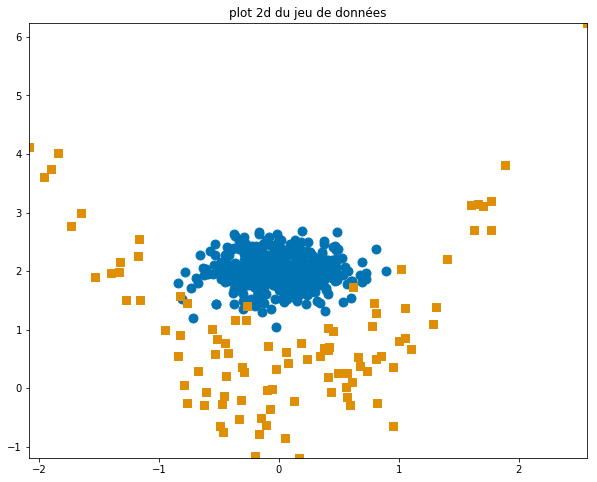

In [25]:
n_ = 100
m_ = 430
X3_comparator, y3_comparator = rand_clown(n1 = n_, n2 = m_, sigma1=0.6, sigma2=0.3)

plt.figure(figsize=(10,8))
plot_2d(X3_comparator, y3_comparator)
plt.title('plot 2d du jeu de données')

x_train_comparator, x_test_comparator, y_train_comparator, y_test_comparator = \
train_test_split(X3_comparator, y3_comparator, test_size=0.6, random_state=2)

### modèle avec Sickit

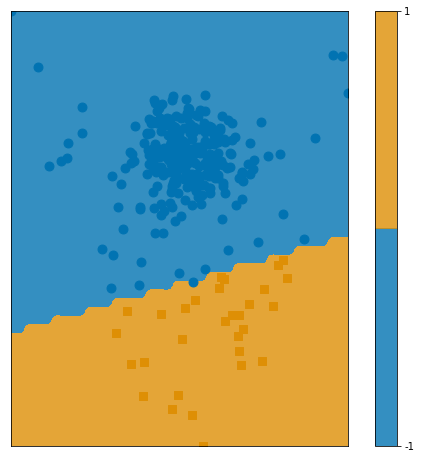

le taux d'erreur sur les données de test vaut 0.094


In [26]:
LDAC_sickit = LinearDiscriminantAnalysis()
LDAC_sickit.fit(x_train_comparator, y_train_comparator)

plt.figure(figsize=(10,8))
frontiere_new(LDAC_sickit, x_test_comparator, LDAC_sickit.predict(x_test_comparator))
plt.show('Classification avec Sickit')
ErrorRate(LDAC_sickit.predict(x_test_comparator), y_test_comparator)

### classe implémentée

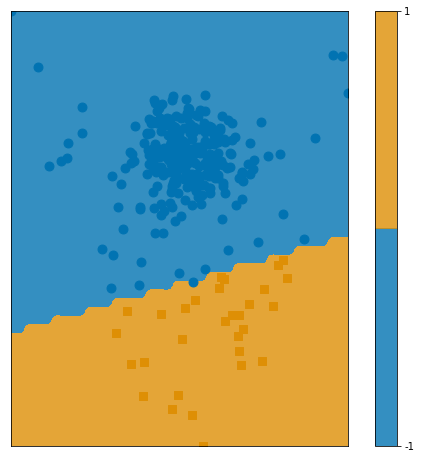

le taux d'erreur sur les données de test vaut 0.094


In [27]:
LDAC_comparator = LDAClassifier()
LDAC_comparator.fit(x_train_comparator, y_train_comparator)

plt.figure(figsize=(10,8))
frontiere_new(LDAC_comparator, x_test_comparator, LDAC_comparator.predict(x_test_comparator))
plt.show('Classification avec classe créee')
ErrorRate(LDAC_comparator.predict(x_test_comparator), y_test_comparator)

In [28]:
print('Les résultats sont identiques')

Les résultats sont identiques


## Question 20

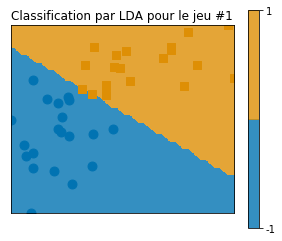

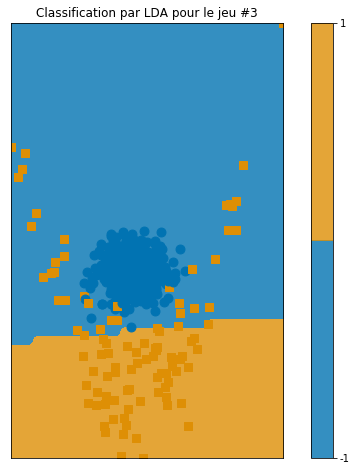

Le modèle avec le sourire de clown est très mal fitté. il faut certainement une classification non linéaire.
Toutefois la LDA est moins sensibles aux points extremes, ce qui n'est pas le cas avec la regression logistic


In [29]:


LDAC_1 = LDAClassifier()
LDAC_1.fit(X1, y1)
plt.figure(figsize=(5,4))
frontiere_new(LDAC_1, X1, y1)
plt.title('Classification par LDA pour le jeu #1')

LDAC_3 = LDAClassifier()
LDAC_3.fit(X3_comparator, y3_comparator)
plt.figure(figsize=(10,8))
frontiere_new(LDAC_3, X3_comparator, y3_comparator)
plt.title('Classification par LDA pour le jeu #3')

plt.show()

print('Le modèle avec le sourire de clown est très mal fitté. il faut certainement une classification non linéaire.\
\nToutefois la LDA est moins sensibles aux points extremes, ce qui n\'est pas le cas avec la regression logistic')

## Question 21

### Comparaison du jeu de données avec LDA et Logistic

In [30]:
x_train_one, x_test_one, y_train_one, y_test_one = train_test_split(X1, y1, test_size=0.2, random_state=2)

LoReg = LogisticRegression(random_state=2, solver='lbfgs',multi_class='multinomial')
LoReg.fit(x_train_one, y_train_one)
print('Prédiction du modèle de Test en regression logistique')
print(LoReg.predict(x_test_one))
ErrorRate(LoReg.predict(x_test_one), y_test_one)

#ajouter LDLA

Dla = LinearDiscriminantAnalysis()
Dla.fit(x_train_one, y_train_one)
print('\nPrédiction du modèle de Test en LDA')
print(Dla.predict(x_test_one))
ErrorRate(Dla.predict(x_test_one), y_test_one)

print('\nIci tout est parfaitement fitté')

Prédiction du modèle de Test en regression logistique
[ 1. -1. -1.  1. -1.  1. -1.  1.]
le taux d'erreur sur les données de test vaut 0.125

Prédiction du modèle de Test en LDA
[ 1. -1. -1.  1. -1.  1. -1.  1.]
le taux d'erreur sur les données de test vaut 0.125

Ici tout est parfaitement fitté


### Modèle avec deux classes de tailles différentes 

In [31]:
n1 = 100
n2 = 10
X1_1, y1_1 = rand_bi_gauss(n1, n2)

x_train_one_, x_test_one_, y_train_one_, y_test_one_ = train_test_split(X1_1, y1_1, test_size=0.2, random_state=2)

LoReg1 = LogisticRegression(random_state=2, solver='lbfgs',multi_class='multinomial')
LoReg1.fit(x_train_one_, y_train_one_)
print('Prédiction du modèle de Test en regression logistique')
print(LoReg1.predict(x_test_one_))
ErrorRate(LoReg1.predict(x_test_one_), y_test_one_)


Dla1 = LinearDiscriminantAnalysis()
Dla1.fit(x_train_one_, y_train_one_)
print('\nPrédiction du modèle de Test en LDA')
print(Dla1.predict(x_test_one_))
ErrorRate(Dla1.predict(x_test_one_), y_test_one_)

print('\nCela ne change rien')

Prédiction du modèle de Test en regression logistique
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.]
le taux d'erreur sur les données de test vaut 0.0

Prédiction du modèle de Test en LDA
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1.]
le taux d'erreur sur les données de test vaut 0.0

Cela ne change rien


### Modèle avec deux classes de tailles différentes et en faisant varier $\mu$ et $\sigma$

Prédiction du modèle de Test en regression logistique
le taux d'erreur sur les données de test vaut 0.048

Prédiction du modèle de Test en LDA
le taux d'erreur sur les données de test vaut 0.024


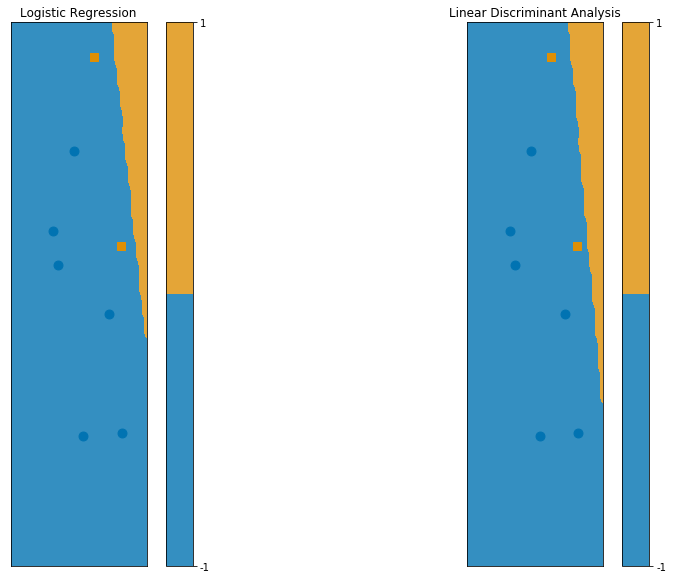

Les modèles sont légèrement différent en termes de classification, mais le taux d'erreur est identique
en général


In [32]:
n1 = 25
n2 = 250
mu1 = [1., 1.5]
mu2 = [-1.1, -2.]
sigmas1 = [0.3, 1.2]
sigmas2 = [0.9, 3.9]
X1_1, y1_1 = rand_bi_gauss(n1, n2, mu1, mu2, sigmas1, sigmas2)

x_train_one_, x_test_one_, y_train_one_, y_test_one_ = train_test_split(X1_1, y1_1, test_size=0.3, random_state=2)

plt.figure(figsize=(15,10))

LoReg2 = LogisticRegression(random_state=2, solver='lbfgs',multi_class='multinomial')
LoReg2.fit(x_train_one_, y_train_one_)
print('Prédiction du modèle de Test en regression logistique')
ErrorRate(LoReg2.predict(x_test_one_), y_test_one_)
plt.subplot(1,2,1)
frontiere_new(LoReg2, x_test_one_, LoReg2.predict(x_test_one))
plt.title('Logistic Regression')

Dla2 = LinearDiscriminantAnalysis()
Dla2.fit(x_train_one_, y_train_one_)
print('\nPrédiction du modèle de Test en LDA')
ErrorRate(Dla2.predict(x_test_one_), y_test_one_)
plt.subplot(1,2,2)
frontiere_new(Dla2, x_test_one_, Dla2.predict(x_test_one))
plt.title('Linear Discriminant Analysis')
plt.show()

print('Les modèles sont légèrement différent en termes de classification, mais le taux d\'erreur est identique\n\
en général')

## Question 22

In [33]:
print('intercept_ correspond à la constante =', LoReg.intercept_[0])
print('coef_ represente les coefficients, il y en a autant qu\'il y a de variables explicatives :\n', LoReg.coef_[0])

intercept_ correspond à la constante = 0.3947137517167975
coef_ represente les coefficients, il y en a autant qu'il y a de variables explicatives :
 [1.01037413 0.80458634]


## Question 23

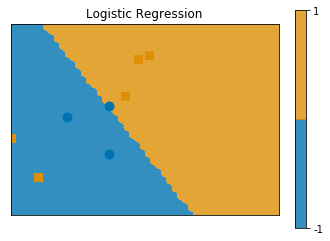

In [34]:
#classification selon une regression logistique
frontiere_new(LoReg, x_train_one, y_test_one)
plt.title('Logistic Regression')
plt.show()

## Question 24

In [35]:
LoReg_digit = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
LoReg_digit.fit(digit_data_train, digit_target_train)

print('intercept_ correspond à la constante =\n', LoReg_digit.intercept_[0])
print('\ncoef_ represente les coefficients, il y en a autant qu\'il y a de variables explicatives :\n'\
, LoReg_digit.coef_[0])

print()
ErrorRate(LoReg_digit.predict(digit_data_test), digit_target_test)

intercept_ correspond à la constante =
 0.00014066483726726502

coef_ represente les coefficients, il y en a autant qu'il y a de variables explicatives :
 [ 0.00000000e+00 -7.88857029e-03 -1.01450208e-02  9.31956913e-02
  4.71869405e-03 -7.24668410e-02 -5.70794064e-02 -1.46654677e-02
 -4.99397172e-05 -3.53670049e-02 -2.55577976e-02  3.07531254e-02
  6.53119754e-02  9.94402997e-02 -2.46993218e-02 -1.83542254e-02
 -2.48911726e-05  2.39653255e-02  1.06135984e-01  1.04204415e-02
 -1.83640314e-01  1.32409663e-01  2.84840556e-02 -5.40896312e-03
 -8.11903979e-06  1.00091879e-01  1.63147017e-01 -6.78728323e-02
 -3.53750309e-01  1.96931016e-02  8.71860260e-02 -6.08825688e-05
  0.00000000e+00  1.24267788e-01  4.38360338e-02 -1.42316141e-01
 -2.84431107e-01  5.14830078e-03  8.97854637e-02  0.00000000e+00
 -1.78794684e-04  3.38760566e-02  1.70328604e-01 -9.34408523e-02
 -1.27498533e-01  1.04311910e-01  2.41119729e-02 -1.35409681e-04
 -4.20106127e-04 -1.82194929e-02  1.46087689e-01 -1.25388560e-02
